In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [2]:


df = pd.read_csv('DATA/american_bankruptcy_updated.csv', header=0)
df

C:\Users\ztillery\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,company_name,status_label,Final Year of Recorded Data,year,current_assets,cogs,depr_amort,ebitda,inventory,net_income,...,net_sales,total_assets,total_debt_long,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
0,C_1,alive,N,1999,511.267,833.107,18.373,89.031,336.018,35.163,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,N,2000,485.856,713.811,18.577,64.367,320.590,18.531,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,N,2001,436.656,526.477,22.496,27.207,286.588,-58.939,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,N,2002,396.412,496.747,27.172,30.745,259.954,-12.410,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,N,2003,432.204,523.302,26.680,47.491,247.245,3.504,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,NaN,2014,233.211,43.338,14.094,45.615,3.376,25.261,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,NaN,2015,105.559,59.184,42.592,202.133,2.288,129.688,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,NaN,2016,63.971,69.074,65.057,79.051,2.581,-1.442,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,NaN,2017,135.207,66.527,65.330,69.171,2.013,-20.401,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [3]:
df["EBIT/TOTAL_ASSETS"] = df["ebit"] / df["total_assets"]
df["NET_SALES/TOTAL_ASSETS"] = df["net_sales"] / df["total_assets"]
df["WORKING_CAPITAL/TOTAL_ASSETS"] = (df["current_assets"]- df["total_current_liabilities"]) / df["total_assets"]
df["SOLVENCY_RATING"] = 0
df["CURRENT_ASSETS/CURRENT_LIABILITIES"] = df["current_assets"] / df["total_current_liabilities"]
df["LIQUIDITY_RATING"] = 0 
df["NET_SALES-COGS"] = (df["net_sales"] - df["cogs"]) / df["net_sales"]
df["PROFITABILITY_RATING"] = 0
df["BUSINESS_HEALTH"] = 0

In [4]:
df = df.drop(columns = ['ebit'])
df = df.drop(columns = ['total_assets']) 
df = df.drop(columns = ['net_sales'])
df = df.drop(columns = ['total_current_liabilities'])
df = df.drop(columns = ['retained_earnings'])
df = df.drop(columns = ['status_label'])
df = df.drop(columns = ['current_assets'])
df = df.drop(columns = ['cogs'])


In [5]:
df 

,company_name,Final Year of Recorded Data,year,depr_amort,ebitda,inventory,net_income,total_receivables,market_value,total_debt_long,...,total_operating_expenses,EBIT/TOTAL_ASSETS,NET_SALES/TOTAL_ASSETS,WORKING_CAPITAL/TOTAL_ASSETS,SOLVENCY_RATING,CURRENT_ASSETS/CURRENT_LIABILITIES,LIQUIDITY_RATING,NET_SALES-COGS,PROFITABILITY_RATING,BUSINESS_HEALTH
0,C_1,N,1999,18.373,89.031,336.018,35.163,128.348,372.7519,180.447,...,935.302,0.095355,1.382369,0.468896,0,3.120983,0,0.186683,0,0
1,C_1,N,2000,18.577,64.367,320.590,18.531,115.187,377.1180,179.987,...,809.888,0.065241,1.245637,0.513588,0,3.874697,0,0.183521,0,0
2,C_1,N,2001,22.496,27.207,286.588,-58.939,77.528,364.5928,217.699,...,611.514,0.006633,0.899355,0.402974,0,2.902063,0,0.175732,0,0
3,C_1,N,2002,27.172,30.745,259.954,-12.410,66.322,143.3295,164.658,...,575.592,0.005204,0.883074,0.280849,0,1.947253,0,0.180741,0,0
4,C_1,N,2003,26.680,47.491,247.245,3.504,104.661,308.9071,248.666,...,604.467,0.029341,0.919167,0.424286,0,3.292707,0,0.197338,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,NaN,2014,14.094,45.615,3.376,25.261,22.846,756.4827,184.666,...,58.608,0.028679,0.094826,0.186529,0,8.270773,0,0.584180,0,0
78678,C_8971,NaN,2015,42.592,202.133,2.288,129.688,54.611,527.5750,770.103,...,89.020,0.085502,0.156037,0.009342,0,1.197792,0,0.796725,0,0
78679,C_8971,NaN,2016,65.057,79.051,2.581,-1.442,42.467,578.8868,683.985,...,90.807,0.008014,0.097271,-0.012481,0,0.745887,0,0.593343,0,0
78680,C_8971,NaN,2017,65.330,69.171,2.013,-20.401,27.217,412.6241,694.035,...,92.713,0.002212,0.093245,0.030641,0,1.648665,0,0.589045,0,0


In [6]:
df.loc[((df['EBIT/TOTAL_ASSETS'] > .05 ) & (df['EBIT/TOTAL_ASSETS'] < .20)), ['SOLVENCY_RATING'] ] += 1
df.loc[((df['EBIT/TOTAL_ASSETS'] > .2)), ['SOLVENCY_RATING']] += 2

df.loc[((df['NET_SALES/TOTAL_ASSETS'] > .25 ) & (df['NET_SALES/TOTAL_ASSETS'] < .50)), ['SOLVENCY_RATING'] ] += 1
df.loc[((df['NET_SALES/TOTAL_ASSETS'] > .50 )), ['SOLVENCY_RATING']] += 2

df.loc[((df['WORKING_CAPITAL/TOTAL_ASSETS'] > 1.5 ) & (df['WORKING_CAPITAL/TOTAL_ASSETS'] < 2)), ['SOLVENCY_RATING'] ] += 1



In [7]:
df.loc[((df['CURRENT_ASSETS/CURRENT_LIABILITIES'] > 1.2 ) & (df['CURRENT_ASSETS/CURRENT_LIABILITIES'] < 2)), ['LIQUIDITY_RATING'] ] += 1
df.loc[((df['CURRENT_ASSETS/CURRENT_LIABILITIES'] > 2 )), ['LIQUIDITY_RATING'] ] += 2

In [8]:
df.loc[((df['NET_SALES-COGS'] > .50 ) & (df['NET_SALES-COGS'] < .70)), ['PROFITABILITY_RATING'] ] += 1
df.loc[((df['NET_SALES-COGS'] > .70 )), ['PROFITABILITY_RATING']] += 2


In [9]:
df["BUSINESS_HEALTH"] = (df['SOLVENCY_RATING'] + df['LIQUIDITY_RATING'] + df['PROFITABILITY_RATING'])

In [10]:
df['BUSINESS_HEALTH'].value_counts()

4    20691
5    16678
3    14622
2    12923
6     6634
1     2547
7     2125
0     1893
8      569
Name: BUSINESS_HEALTH, dtype: int64

In [11]:
df['PROFITABILITY_RATING'].value_counts()

0    55842
1    13767
2     9073
Name: PROFITABILITY_RATING, dtype: int64

In [12]:
df['SOLVENCY_RATING'].value_counts()

2    29287
3    28328
0     8744
1     7359
4     4964
Name: SOLVENCY_RATING, dtype: int64

In [13]:
df['LIQUIDITY_RATING'].value_counts()

2    37057
1    20844
0    20781
Name: LIQUIDITY_RATING, dtype: int64

In [82]:
df_company = df.drop_duplicates(subset=["company_name"])
df_company

,company_name,Final Year of Recorded Data,year,depr_amort,ebitda,inventory,net_income,total_receivables,market_value,total_debt_long,...,total_operating_expenses,EBIT/TOTAL_ASSETS,NET_SALES/TOTAL_ASSETS,WORKING_CAPITAL/TOTAL_ASSETS,SOLVENCY_RATING,CURRENT_ASSETS/CURRENT_LIABILITIES,LIQUIDITY_RATING,NET_SALES-COGS,PROFITABILITY_RATING,BUSINESS_HEALTH
0,C_1,N,1999,18.373,89.031,336.018,35.163,128.348,372.7519,180.447,...,935.302,0.095355,1.382369,0.468896,3,3.120983,2,0.186683,0,5
19,C_2,NaN,1999,102.090,413.739,243.882,87.635,436.751,7161.3749,11.024,...,1513.208,0.186334,1.152116,0.368594,3,2.492864,2,0.517298,1,6
31,C_3,NaN,1999,0.667,-0.265,5.494,-2.207,3.924,3.2449,5.974,...,29.635,-0.066638,2.099957,0.497140,2,3.479672,2,0.325979,0,4
40,C_4,N,1999,25.633,123.160,161.033,36.972,189.261,910.5998,591.784,...,609.283,0.084056,0.631272,0.187540,3,2.324576,2,0.499370,0,5
49,C_5,NaN,1999,2.024,3.873,10.947,-0.138,15.890,6.1972,0.591,...,103.437,0.043805,2.542289,-0.257711,2,0.726924,0,0.258531,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78652,C_8967,NaN,2010,1123.000,4191.000,4824.000,10151.000,3747.000,19420.6232,6036.000,...,36960.000,0.120342,1.614145,0.353926,3,2.897183,2,0.125611,0,5
78661,C_8968,NaN,2013,0.441,-34.415,7.271,-35.578,0.660,52.0572,0.000,...,36.670,-0.502791,0.032528,0.885510,0,10.521948,2,0.090466,0,2
78666,C_8969,NaN,2014,86.700,211.600,205.800,-29.900,327.300,4227.5957,1400.800,...,631.600,0.027405,0.185010,0.293093,0,6.506183,2,0.615275,1,3
78671,C_8970,NaN,2013,45.600,409.000,314.600,31.000,266.100,4243.5215,1272.000,...,1684.500,0.183545,1.057377,0.218546,3,1.882161,1,0.423931,0,4


In [83]:
df_sub = df_company.drop(["company_name", "Final Year of Recorded Data", "year"], axis =1)

In [84]:
df_sub

,depr_amort,ebitda,inventory,net_income,total_receivables,market_value,total_debt_long,gross_profit,total_revenue,total_liabilities,total_operating_expenses,EBIT/TOTAL_ASSETS,NET_SALES/TOTAL_ASSETS,WORKING_CAPITAL/TOTAL_ASSETS,SOLVENCY_RATING,CURRENT_ASSETS/CURRENT_LIABILITIES,LIQUIDITY_RATING,NET_SALES-COGS,PROFITABILITY_RATING,BUSINESS_HEALTH
0,18.373,89.031,336.018,35.163,128.348,372.7519,180.447,191.226,1024.333,401.483,935.302,0.095355,1.382369,0.468896,3,3.120983,2,0.186683,0,5
19,102.090,413.739,243.882,87.635,436.751,7161.3749,11.024,996.805,1926.947,423.978,1513.208,0.186334,1.152116,0.368594,3,2.492864,2,0.517298,1,6
31,0.667,-0.265,5.494,-2.207,3.924,3.2449,5.974,9.574,29.370,8.778,29.635,-0.066638,2.099957,0.497140,2,3.479672,2,0.325979,0,4
40,25.633,123.160,161.033,36.972,189.261,910.5998,591.784,365.760,732.443,808.333,609.283,0.084056,0.631272,0.187540,3,2.324576,2,0.499370,0,5
49,2.024,3.873,10.947,-0.138,15.890,6.1972,0.591,27.743,107.310,52.453,103.437,0.043805,2.542289,-0.257711,2,0.726924,0,0.258531,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78652,1123.000,4191.000,4824.000,10151.000,3747.000,19420.6232,6036.000,5169.000,41151.000,13898.000,36960.000,0.120342,1.614145,0.353926,3,2.897183,2,0.125611,0,5
78661,0.441,-34.415,7.271,-35.578,0.660,52.0572,0.000,0.204,2.255,6.940,36.670,-0.502791,0.032528,0.885510,0,10.521948,2,0.090466,0,2
78666,86.700,211.600,205.800,-29.900,327.300,4227.5957,1400.800,518.800,843.200,2005.000,631.600,0.027405,0.185010,0.293093,0,6.506183,2,0.615275,1,3
78671,45.600,409.000,314.600,31.000,266.100,4243.5215,1272.000,887.500,2093.500,2035.600,1684.500,0.183545,1.057377,0.218546,3,1.882161,1,0.423931,0,4


In [85]:
y = df_sub['BUSINESS_HEALTH']
#X_all = df_sub.drop("BUSINESS_HEALTH", axis=1).select_dtypes("number")
#X_all

,depr_amort,ebitda,inventory,net_income,total_receivables,market_value,total_debt_long,gross_profit,total_revenue,total_liabilities,total_operating_expenses,EBIT/TOTAL_ASSETS,NET_SALES/TOTAL_ASSETS,WORKING_CAPITAL/TOTAL_ASSETS,SOLVENCY_RATING,CURRENT_ASSETS/CURRENT_LIABILITIES,LIQUIDITY_RATING,NET_SALES-COGS,PROFITABILITY_RATING
0,18.373,89.031,336.018,35.163,128.348,372.7519,180.447,191.226,1024.333,401.483,935.302,0.095355,1.382369,0.468896,3,3.120983,2,0.186683,0
19,102.090,413.739,243.882,87.635,436.751,7161.3749,11.024,996.805,1926.947,423.978,1513.208,0.186334,1.152116,0.368594,3,2.492864,2,0.517298,1
31,0.667,-0.265,5.494,-2.207,3.924,3.2449,5.974,9.574,29.370,8.778,29.635,-0.066638,2.099957,0.497140,2,3.479672,2,0.325979,0
40,25.633,123.160,161.033,36.972,189.261,910.5998,591.784,365.760,732.443,808.333,609.283,0.084056,0.631272,0.187540,3,2.324576,2,0.499370,0
49,2.024,3.873,10.947,-0.138,15.890,6.1972,0.591,27.743,107.310,52.453,103.437,0.043805,2.542289,-0.257711,2,0.726924,0,0.258531,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78652,1123.000,4191.000,4824.000,10151.000,3747.000,19420.6232,6036.000,5169.000,41151.000,13898.000,36960.000,0.120342,1.614145,0.353926,3,2.897183,2,0.125611,0
78661,0.441,-34.415,7.271,-35.578,0.660,52.0572,0.000,0.204,2.255,6.940,36.670,-0.502791,0.032528,0.885510,0,10.521948,2,0.090466,0
78666,86.700,211.600,205.800,-29.900,327.300,4227.5957,1400.800,518.800,843.200,2005.000,631.600,0.027405,0.185010,0.293093,0,6.506183,2,0.615275,1
78671,45.600,409.000,314.600,31.000,266.100,4243.5215,1272.000,887.500,2093.500,2035.600,1684.500,0.183545,1.057377,0.218546,3,1.882161,1,0.423931,0


,depr_amort,ebitda,inventory,net_income,total_receivables,market_value,total_debt_long,gross_profit,total_revenue,total_liabilities,total_operating_expenses,EBIT/TOTAL_ASSETS,NET_SALES/TOTAL_ASSETS,WORKING_CAPITAL/TOTAL_ASSETS,SOLVENCY_RATING,CURRENT_ASSETS/CURRENT_LIABILITIES,LIQUIDITY_RATING,NET_SALES-COGS,PROFITABILITY_RATING,BUSINESS_HEALTH
0,18.373,89.031,336.018,35.163,128.348,372.7519,180.447,191.226,1024.333,401.483,935.302,0.095355,1.382369,0.468896,3,3.120983,2,0.186683,0,5
19,102.090,413.739,243.882,87.635,436.751,7161.3749,11.024,996.805,1926.947,423.978,1513.208,0.186334,1.152116,0.368594,3,2.492864,2,0.517298,1,6
31,0.667,-0.265,5.494,-2.207,3.924,3.2449,5.974,9.574,29.370,8.778,29.635,-0.066638,2.099957,0.497140,2,3.479672,2,0.325979,0,4
40,25.633,123.160,161.033,36.972,189.261,910.5998,591.784,365.760,732.443,808.333,609.283,0.084056,0.631272,0.187540,3,2.324576,2,0.499370,0,5
49,2.024,3.873,10.947,-0.138,15.890,6.1972,0.591,27.743,107.310,52.453,103.437,0.043805,2.542289,-0.257711,2,0.726924,0,0.258531,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78652,1123.000,4191.000,4824.000,10151.000,3747.000,19420.6232,6036.000,5169.000,41151.000,13898.000,36960.000,0.120342,1.614145,0.353926,3,2.897183,2,0.125611,0,5
78661,0.441,-34.415,7.271,-35.578,0.660,52.0572,0.000,0.204,2.255,6.940,36.670,-0.502791,0.032528,0.885510,0,10.521948,2,0.090466,0,2
78666,86.700,211.600,205.800,-29.900,327.300,4227.5957,1400.800,518.800,843.200,2005.000,631.600,0.027405,0.185010,0.293093,0,6.506183,2,0.615275,1,3
78671,45.600,409.000,314.600,31.000,266.100,4243.5215,1272.000,887.500,2093.500,2035.600,1684.500,0.183545,1.057377,0.218546,3,1.882161,1,0.423931,0,4


In [128]:
df_sub.corr()["BUSINESS_HEALTH"]

depr_amort                           -0.019977
ebitda                                0.046687
inventory                             0.046055
net_income                            0.020187
total_receivables                     0.016116
market_value                          0.063260
total_debt_long                      -0.040315
gross_profit                          0.064262
total_revenue                         0.018127
total_liabilities                    -0.031390
total_operating_expenses              0.012455
EBIT/TOTAL_ASSETS                     0.084457
NET_SALES/TOTAL_ASSETS                0.049716
WORKING_CAPITAL/TOTAL_ASSETS          0.055108
SOLVENCY_RATING                       0.718368
CURRENT_ASSETS/CURRENT_LIABILITIES    0.028492
LIQUIDITY_RATING                      0.555186
NET_SALES-COGS                        0.091710
PROFITABILITY_RATING                  0.428600
BUSINESS_HEALTH                       1.000000
Name: BUSINESS_HEALTH, dtype: float64

In [171]:
y = df_sub['BUSINESS_HEALTH']
#X = df_sub.drop("BUSINESS_HEALTH", axis=1).select_dtypes("number")
X = df_sub[['EBIT/TOTAL_ASSETS', 'NET_SALES/TOTAL_ASSETS', 'WORKING_CAPITAL/TOTAL_ASSETS','CURRENT_ASSETS/CURRENT_LIABILITIES', 'NET_SALES-COGS']]
#X = df_sub.drop(['EBIT/TOTAL_ASSETS', 'NET_SALES/TOTAL_ASSETS', 'WORKING_CAPITAL/TOTAL_ASSETS', 'NET_SALES-COGS'], axis =1)
#X = df_sub.drop(['SOLVENCY_RATING', 'LIQUIDITY_RATING', 'PROFITABILITY_RATING'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [172]:
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=10)

In [173]:
y_pred = classifier.predict(X_test) 

In [174]:
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label='label')
#roc_auc = auc(false_positive_rate, true_positive_rate)
#print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :98.71866295264624

Confusion Matrix
----------------


Predicted,0,1,2,3,4,5,6,7,8,All
True,,,,,,,,,,
0,74,0,0,0,0,0,0,0,0,74
1,0,81,0,0,0,0,0,0,0,81
2,0,2,401,0,0,0,0,0,0,403
3,0,1,1,304,3,0,0,0,0,309
4,0,0,0,3,391,1,0,0,0,395
5,0,0,0,0,2,307,2,0,0,311
6,0,0,0,0,0,2,150,1,0,153
7,0,0,0,0,0,0,5,49,0,54
8,0,0,0,0,0,0,0,0,15,15


In [50]:
X_test = df_sub.transform(X_test)
y_preds = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_preds))

AttributeError: 'depr_amort' is not a valid function for 'Series' object

In [51]:
classifier_2 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
classifier_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

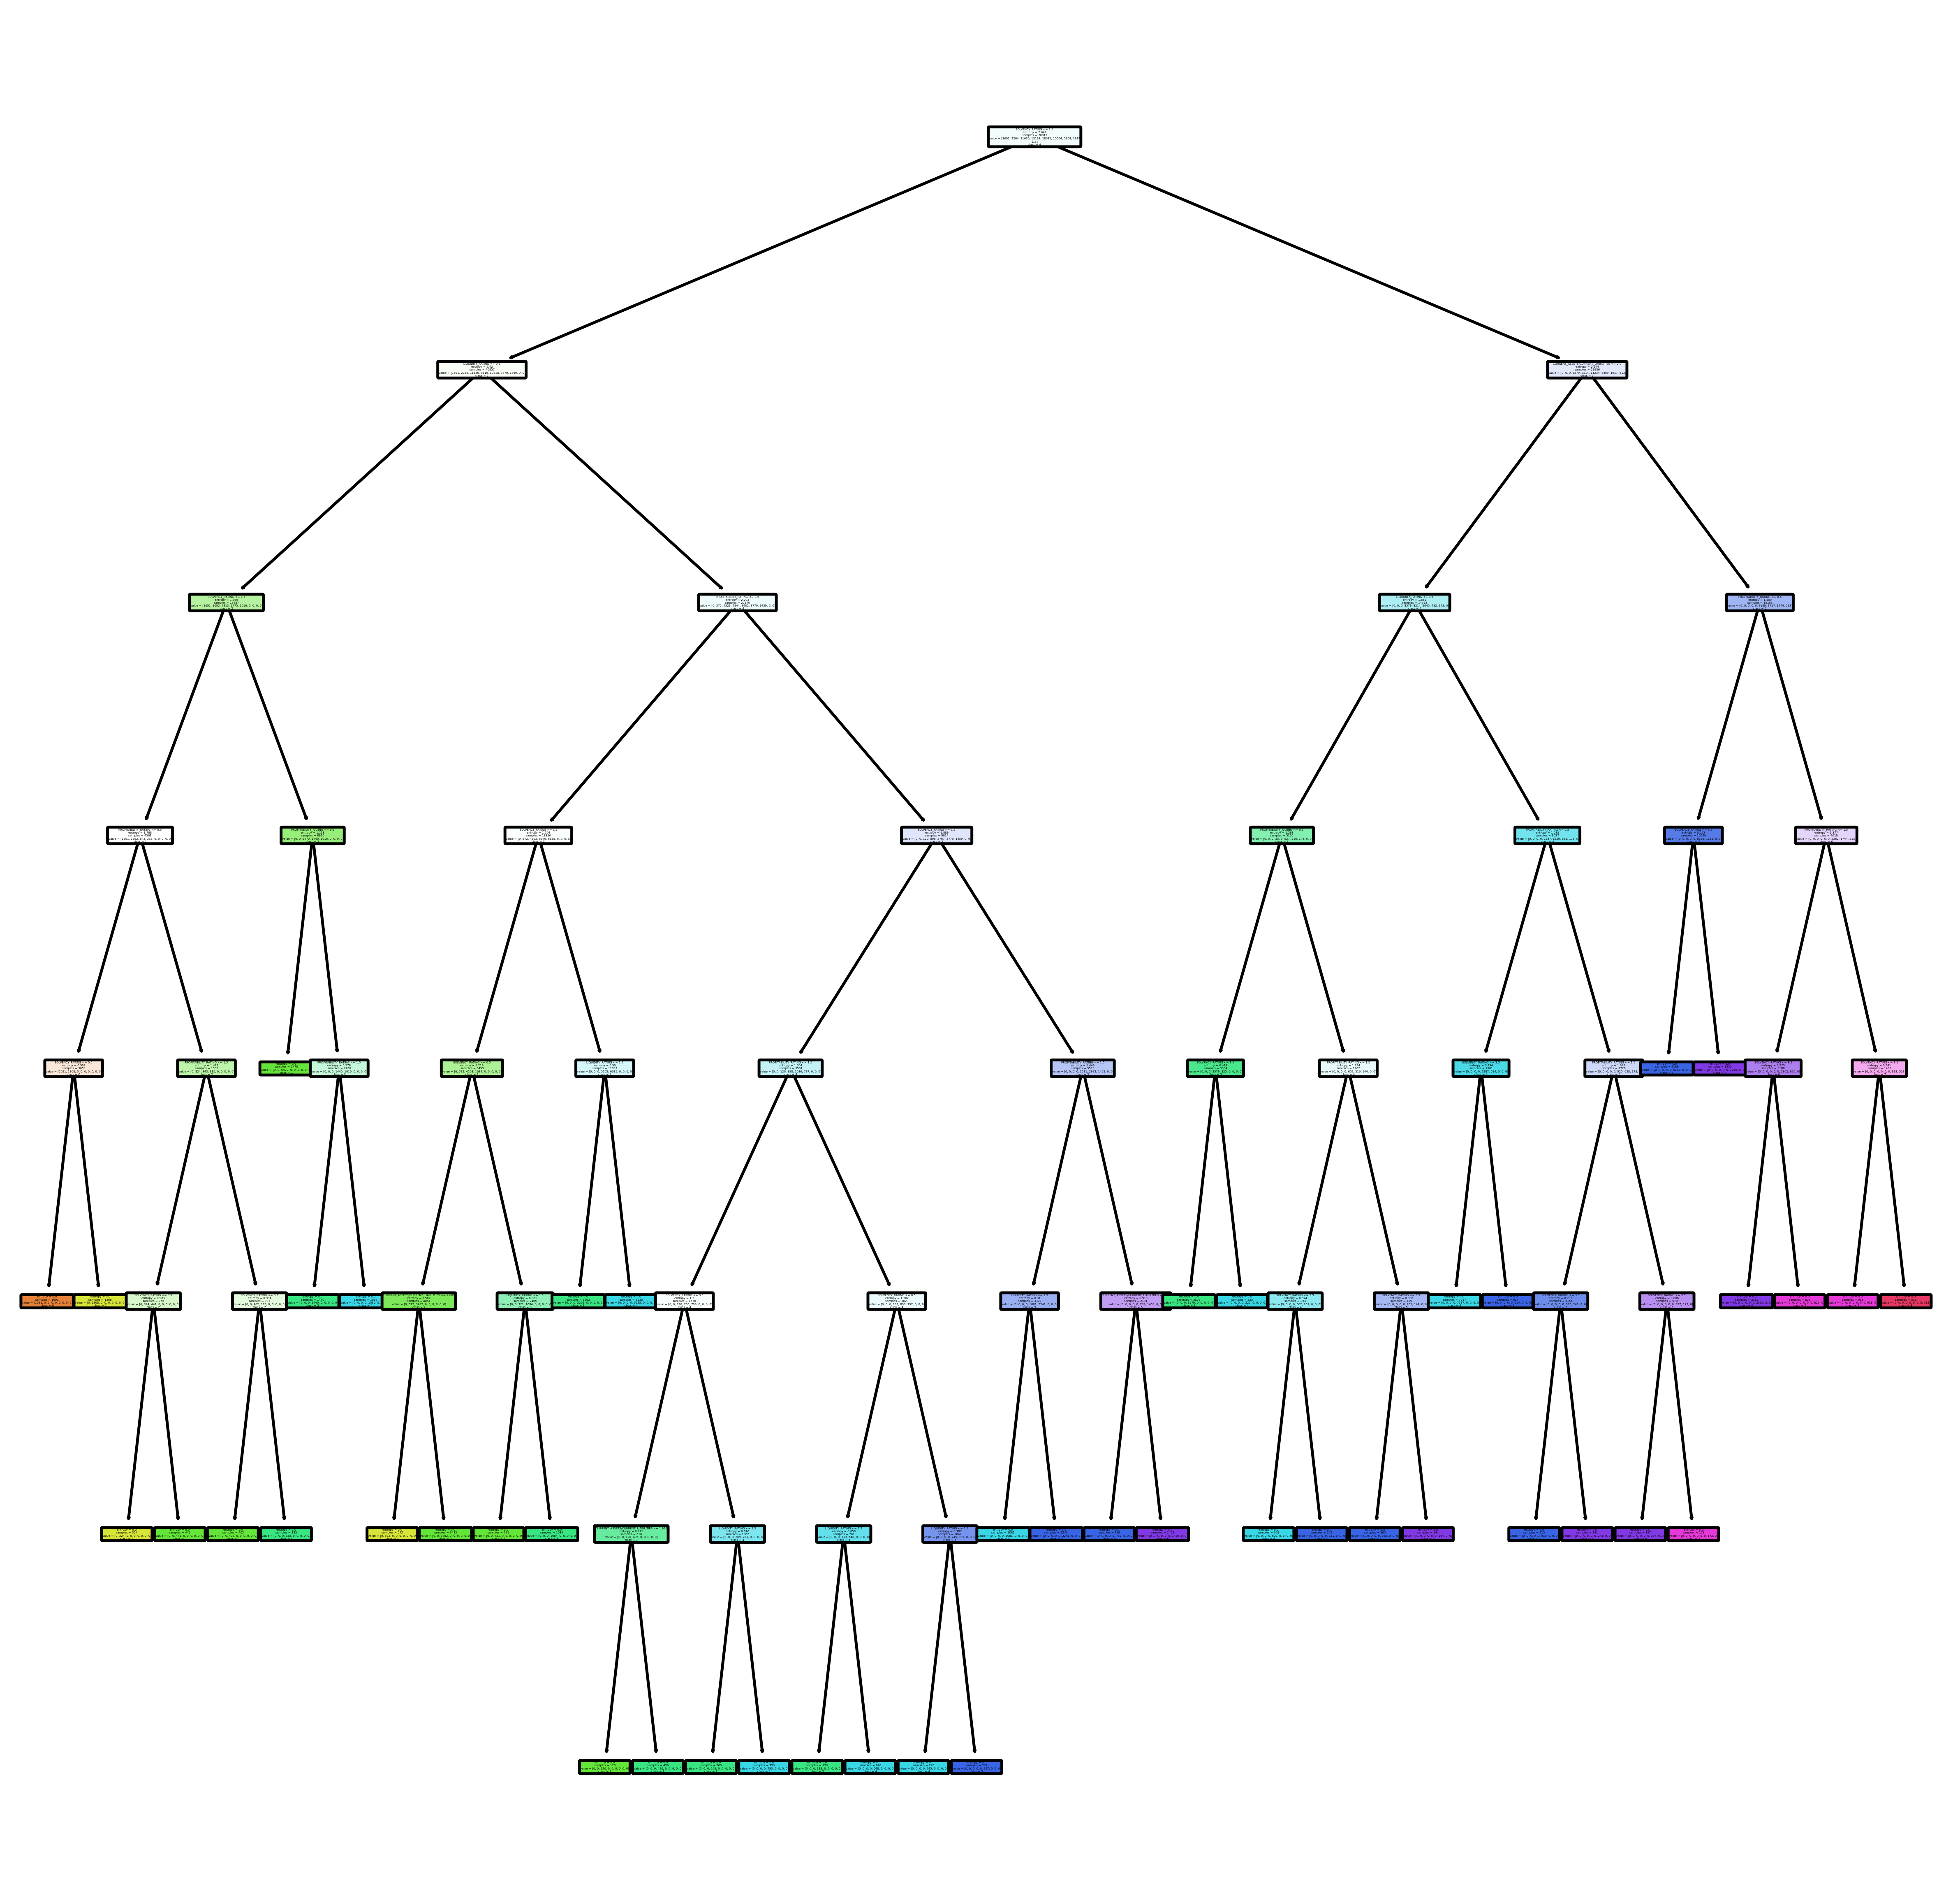

In [52]:
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(classifier_2, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()